In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
train=pd.read_csv('final_df.csv')
Y=train.LoanStatus
X=train.drop('LoanStatus',axis=1)

In [18]:
X=pd.get_dummies(X)

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
all_scores={}

In [23]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=1,max_iter=500)

scores=cross_val_score(clf,X,Y,cv=5)
print(scores)

print("The accuracy of Logistic Regression is {:.2f}".format(scores.mean()*100))
all_scores['LogisticRegression']=scores.mean()*100

[0.81300813 0.77235772 0.7804878  0.85365854 0.81967213]
The accuracy of Logistic Regression is 80.78


In [25]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()

scores=cross_val_score(clf,X,Y,cv=5)
scores

print("The accuracy of GaussianNB is {:.2f}".format(scores.mean()*100))
all_scores['GaussianNB']=scores.mean()*100

The accuracy of GaussianNB is 79.81


In [26]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

scores=cross_val_score(clf,X,Y,cv=5)
scores

print("The accuracy of Decision Tree Classifier is {:.2f}".format(scores.mean()*100))
all_scores['DecisonTree']=scores.mean()*100

The accuracy of Decision Tree Classifier is 70.37


In [28]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)

scores=cross_val_score(clf,X,Y,cv=5)
scores

print("The accuracy of Random Forest Classifier is {:.2f}".format(scores.mean()*100))
all_scores['RandomForestClassifier']=scores.mean()*100

The accuracy of Random Forest Classifier is 73.62


In [33]:
from sklearn.svm import SVC
clf=SVC()

scores=cross_val_score(clf,X,Y,cv=5)
scores

print("The accuracy of Support Vector Classifier is {:.2f}".format(scores.mean()*100))
all_scores['SVC']=scores.mean()*100

The accuracy of Support Vector Classifier is 68.73


In [31]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)

scores=cross_val_score(clf,X,Y,cv=5)
scores

print("The accuracy of K NN Classifier is {:.2f}".format(scores.mean()*100))
all_scores['KNN']=scores.mean()*100

The accuracy of K NN Classifier is 70.68


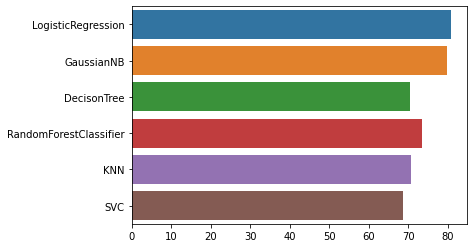

In [35]:
sns.barplot(x=list(all_scores.values()),y=list(all_scores.keys()))

In [36]:
from sklearn.linear_model import LogisticRegressionCV
LogisticRegressionCV(cv=5,max_iter=500,random_state=0).fit(X,Y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=500, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train , X_test , Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

Dependents          --0.017687308838717216
LoanAmountTerm      ---0.00017901747118398518
CreditHistory       --0.7006325965620605
LoanAmount_Log      ---0.04526042499474459
Income_Log          --0.0221877673772823
Gender_Female       --28558084758636.836
Gender_Male         --28558084758636.83
Married_No          ---11899502536412.004
Married_Yes         ---11899502536411.92
Education_Graduate  --1678606204262.6028
Education_Not Graduate--1678606204262.5417
SelfEmployed_No     ---1229941813002.0874
SelfEmployed_Yes    ---1229941813002.1038
PropertyArea_Rural  --34224103555137.465
PropertyArea_Semiurban--34224103555137.586
PropertyArea_Urban  --34224103555137.45
0.2869554456773695


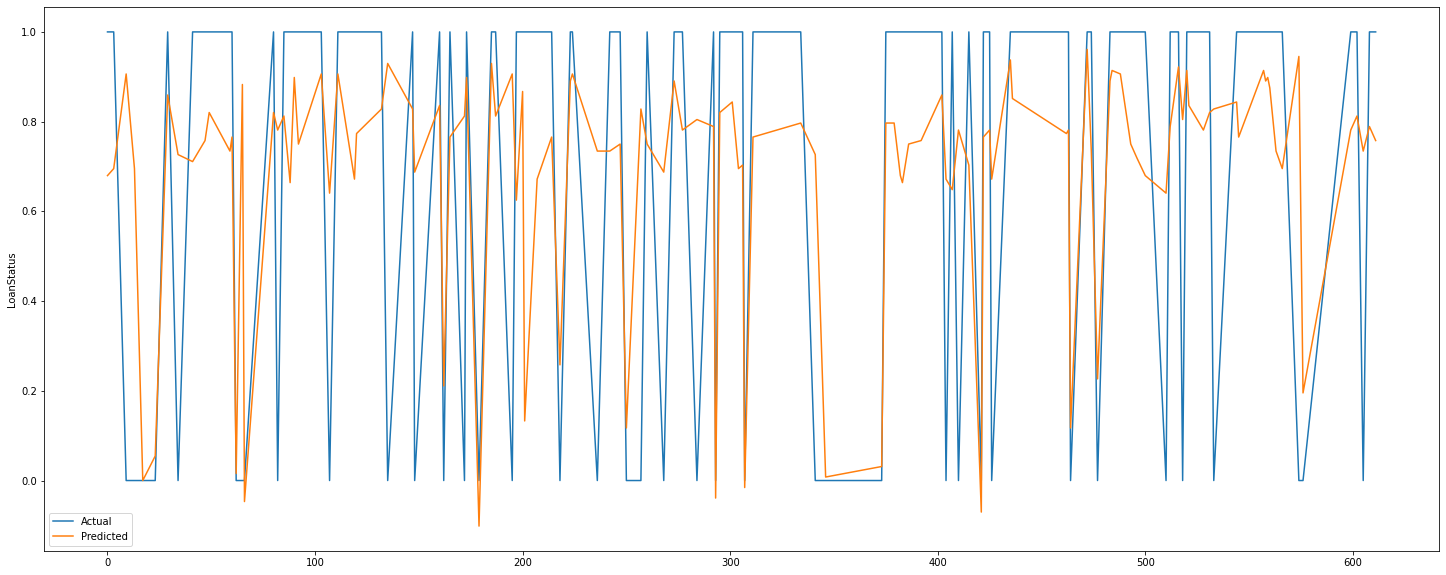

In [52]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
model.fit(X_train,Y_train)


model.coef_

Y_pred=model.predict(X_test)

for t in zip(X_train.columns,model.coef_):
    print(f"{t[0]:20s}--{t[1]}")

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print(r2_score(Y_test,Y_pred))

sns.lineplot(y=Y_test,x=X_test.index,label='Actual')
sns.lineplot(y=Y_pred,x=X_test.index,label='Predicted')
plt.gcf().set_size_inches(25,10)



0.26950164835164836


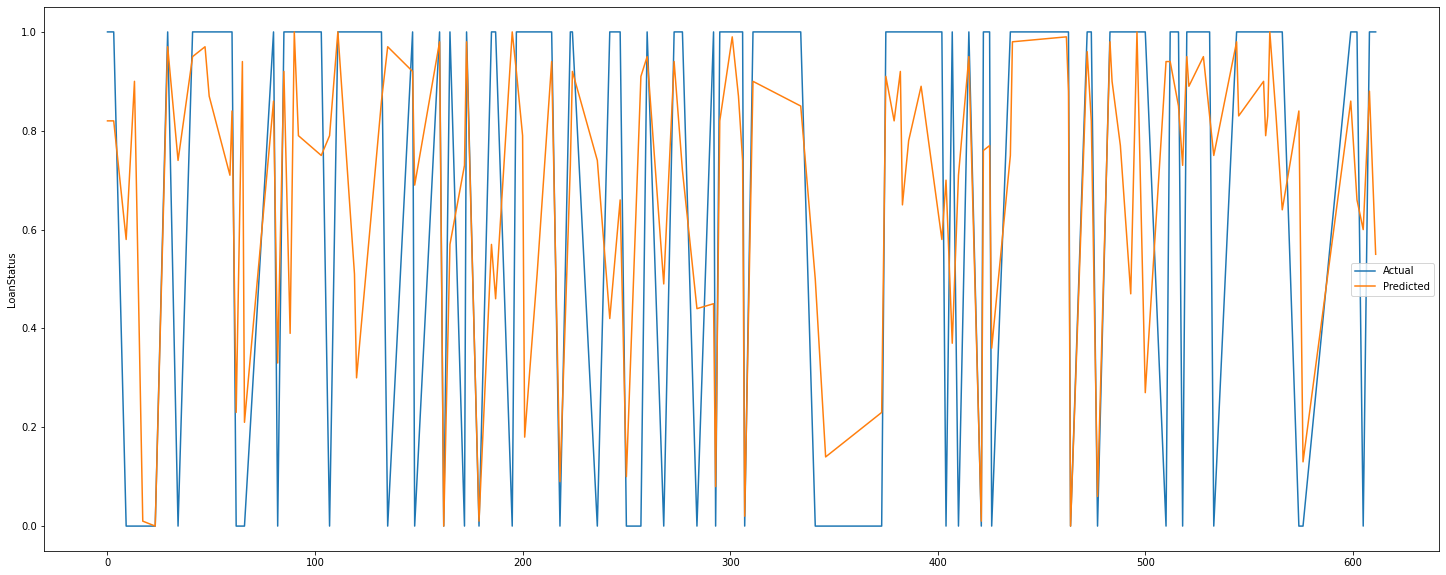

In [55]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)



from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print(r2_score(Y_test,Y_pred))

sns.lineplot(y=Y_test,x=X_test.index,label='Actual')
sns.lineplot(y=Y_pred,x=X_test.index,label='Predicted')
plt.gcf().set_size_inches(25,10)
